In [1]:
import acoular as ac
import numpy as np
import matplotlib.pyplot as plt
from AIAAread import *
from pathlib import Path

## Get the data
from [data.dtu.dk](https://doi.org/10.11583/DTU.c.7222614) and put it in this folder.

In [2]:
time_file = "DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_TimeSeries.h5"
csm_file = "DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_octave-12_CsmEss.h5"
data = Path('data')

## Task1

In [3]:
ts = TimeSamplesAIAABenchmark(name=time_file)
ps = ac.PowerSpectra(time_data=ts, block_size=4096, overlap='50%', window='Hanning')
for f in (500,1000):
    ind = np.searchsorted(ps.fftfreq(),f)
    np.savetxt(data / f'task1_TUB_Acoular_CSM_real_f_{f}.csv', ps.csm[ind].real, delimiter=';')
    np.savetxt(data / f'task1_TUB_Acoular_CSM_imag_f_{f}.csv', ps.csm[ind].imag, delimiter=';')    

[('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_TimeSeries_cache.h5', 1)]


## Task2

In [23]:
mg = MicAIAABenchmark(from_file=time_file)
rg = ac.RectGrid(x_min=-1.0, x_max=1.0, y_min=-1.0, y_max=1.0, z=2.3,increment=0.05)
env = ac.Environment(c=338.21164) # see speedOfSoundMPersS in time_file
st = ac.SteeringVector(env=env, mics=mg, grid=rg, steer_type='true level') # true level = formulation III
psf = ac.PointSpreadFunction(steer=st, calcmode='single', grid_indices=(rg.size//2,)) # grid center
for f in (500,1000,2000,4000):
    psf.freq = f
    thepsf = psf.psf.reshape(rg.shape)
    np.savetxt(data / f'task2_TUB_Acoular_PSF_f_{f}.csv', thepsf, delimiter=';')

[('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_TimeSeries_cache.h5', 1), ('psf_6823d672fac66bd127b7b7ecff6a3971_cache.h5', 2), ('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_octave-12_CsmEss_cache.h5', 9)]


## Task3

[('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_TimeSeries_cache.h5', 1), ('psf_6823d672fac66bd127b7b7ecff6a3971_cache.h5', 2), ('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_octave-12_CsmEss_cache.h5', 17)]


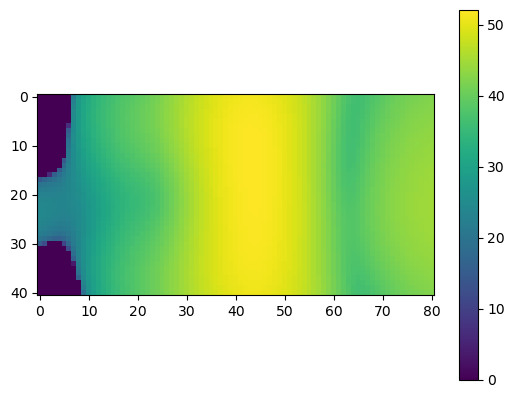

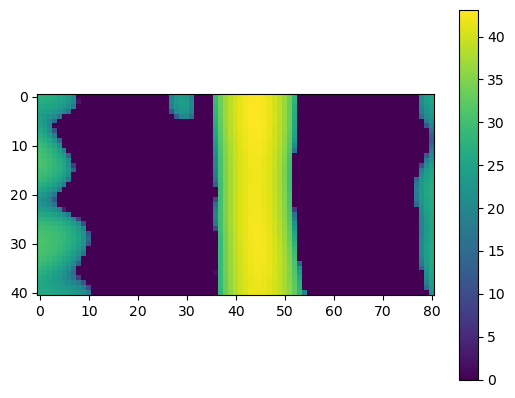

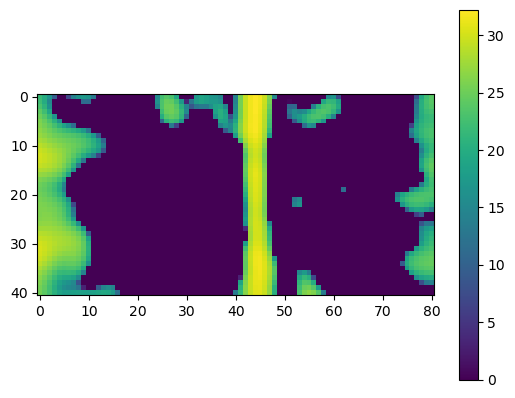

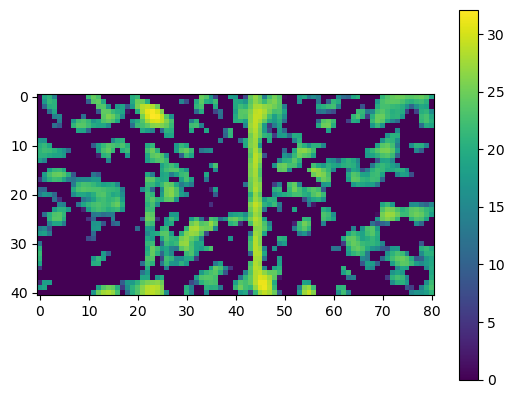

In [34]:
ps1 = CsmAIAABenchmark(name=csm_file)
rg.x_min = -2.0
rg.x_max = 2.0 # we have now 41 by 81 points, however
st.env = env
bb = ac.BeamformerBase(freq_data=ps1, steer=st, r_diag=True)
for f in (500,1000,2000,4000):
    ind = np.argmin((ps1.fftfreq()-f)**2)
    map = bb.synthetic(ps1.fftfreq()[ind],0)
    np.savetxt(data / f'task3_TUB_Acoular_CBF_f_{f}.csv', map, delimiter=';')
    #plt.figure()
    #plt.imshow(ac.L_p(map.T),vmin=0)
    #plt.colorbar()

## Task4

In [30]:
bc = ac.BeamformerCleansc(freq_data=ps1, steer=st, r_diag=True, damp=0.5, n=100)
for f in (500,1000,2000,4000):
    ind = np.argmin((ps1.fftfreq()-f)**2)
    map = bc.synthetic(ps1.fftfreq()[ind],0)
    np.savetxt(data / f'task4_TUB_Acoular_CleanSC_f_{f}.csv', map, delimiter=';')
    #plt.figure()
    #plt.imshow(ac.L_p(map.T),vmin=0)
    #plt.colorbar()

[('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_TimeSeries_cache.h5', 1), ('psf_6823d672fac66bd127b7b7ecff6a3971_cache.h5', 2), ('DTU_PLCT_NACA63018_trip_5PS_5SS_U0_50_AoA_0_octave-12_CsmEss_cache.h5', 15)]


## Task5

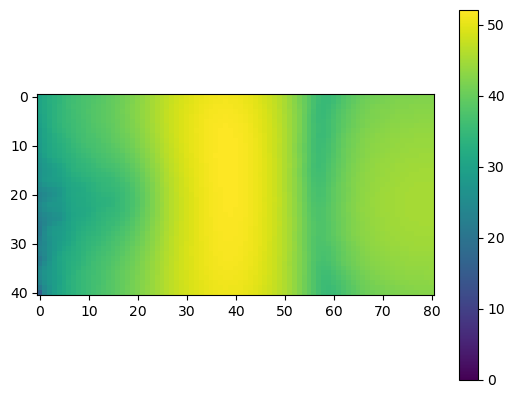

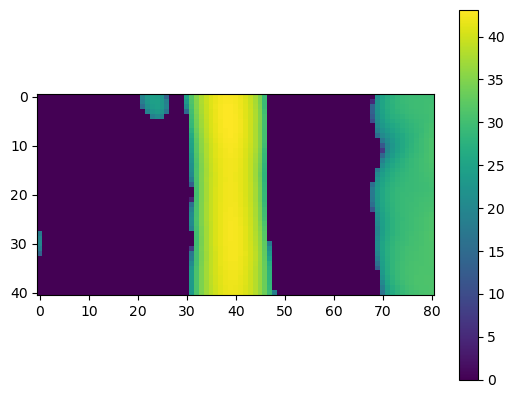

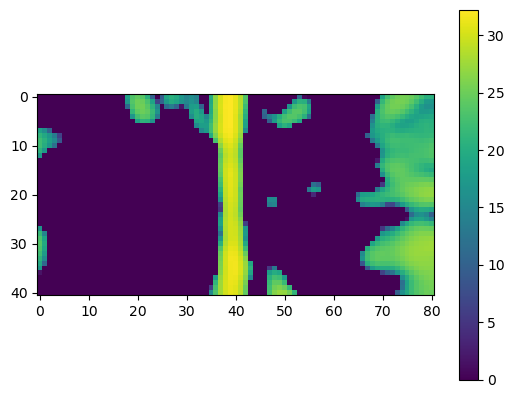

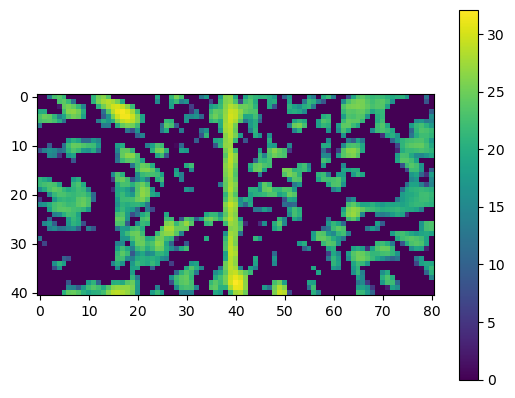

In [36]:
jet = ac.SlotJet( v0=50.0, flow=(1,0,0), origin=(-2.01,0,2.3), B=2*(2.3-0.8)) 
env1 = ac.GeneralFlowEnvironment(ff=jet, N=400, c=338.21164, Om=1.2*np.pi)
st.env = env1
for f in (500,1000,2000,4000):
    ind = np.argmin((ps1.fftfreq()-f)**2)
    map = bb.synthetic(ps1.fftfreq()[ind],0)
    np.savetxt(data / f'task5_TUB_Acoular_CBF_f_{f}.csv', map, delimiter=';')
    #plt.figure()
    #plt.imshow(ac.L_p(map.T),vmin=0)
    #plt.colorbar()    

## Task6

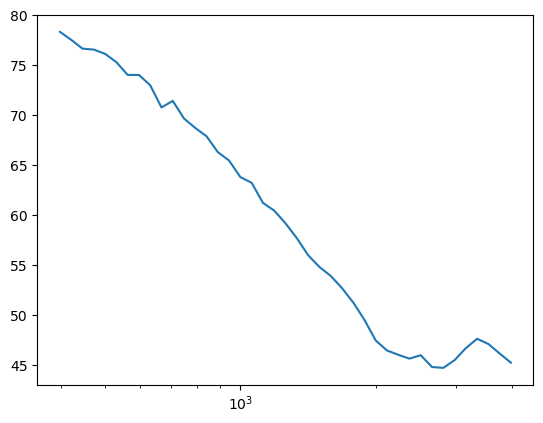

In [49]:
sect = ac.RectSector(x_min=-0.5, x_max=0.5, y_min=-0.4, y_max=0.4)
indices = np.arange(np.argmin((ps1.fftfreq()-400)**2),np.argmin((ps1.fftfreq()-4000)**2)+1)
fr = ps1.fftfreq()[indices]
levels = ac.L_p(bb.integrate(sect))[indices]
np.savetxt(data / f'task6_TUB_Acoular_CBF_srcint.csv', np.vstack((fr,levels)).T, delimiter=';')
#plt.semilogx(fr,levels)

## Task7

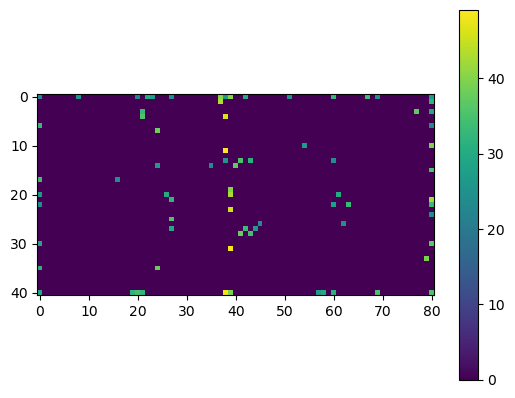

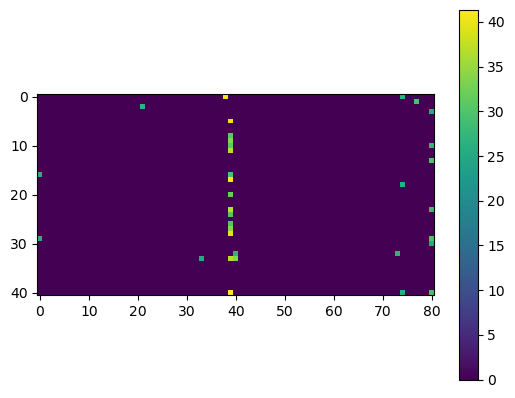

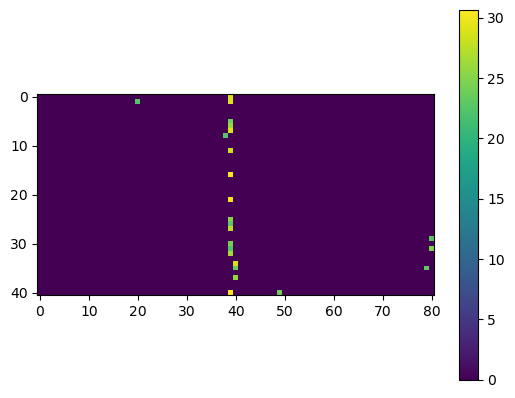

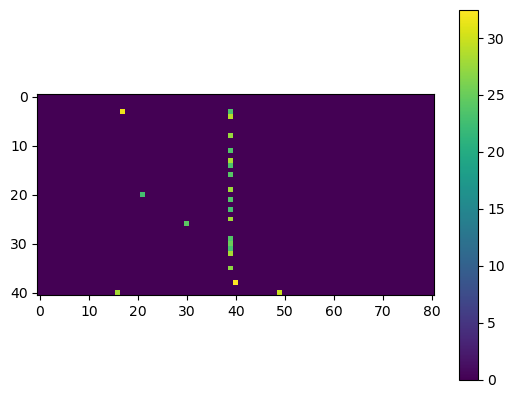

In [37]:
for f in (500,1000,2000,4000):
    ind = np.argmin((ps1.fftfreq()-f)**2)
    map = bc.synthetic(ps1.fftfreq()[ind],0)
    np.savetxt(data / f'task7_TUB_Acoular_CleanSC_f_{f}.csv', map, delimiter=';')
    #plt.figure()
    #plt.imshow(ac.L_p(map.T),vmin=0)
    #plt.colorbar()

## Task8

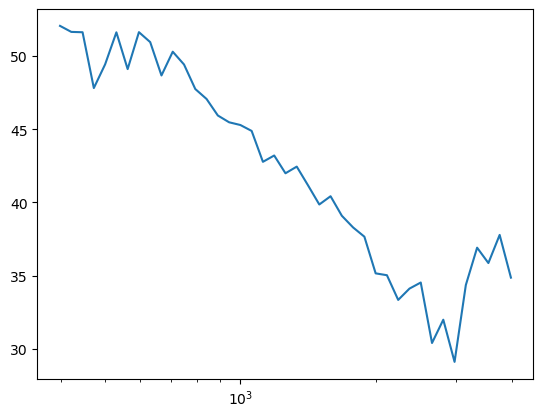

In [51]:
levels = ac.L_p(bc.integrate(sect))[indices]
np.savetxt(data / f'task8_TUB_Acoular_CleanSC_srcint.csv', np.vstack((fr,levels)).T, delimiter=';')
#plt.semilogx(fr,levels)